<a href="https://colab.research.google.com/github/archie46/Machine-Learning/blob/main/Patients_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ht.csv to ht.csv


In [ ]:
from pandas import read_csv
file = "ht.csv"
data = read_csv(file,usecols =['CHEST_PAIN?','MALE?','SMOKES?','EXERCISES?','HEART_ATTACK?'])

data.shape

(6, 5)

In [ ]:
data

,CHEST_PAIN?,MALE?,SMOKES?,EXERCISES?,HEART_ATTACK?
0,yes,yes,no,yes,yes
1,yes,yes,yes,no,yes
2,no,no,yes,no,yes
3,no,yes,no,yes,no
4,yes,no,yes,yes,yes
5,no,yes,yes,yes,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = ['CHEST_PAIN?','MALE?','SMOKES?','EXERCISES?','HEART_ATTACK?']
for i in labels:
    data[i] = le.fit_transform(data[i])


In [ ]:
x = data.filter(['CHEST_PAIN?','MALE?','SMOKES?','EXERCISES?'],axis = 1)
y = data['HEART_ATTACK?']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4, 4)
(4,)
(2, 4)
(2,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy')
classifier.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array([0, 1])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
confusion_matrix(y_test,y_pred)

array([[1, 0],
       [0, 1]])

In [ ]:
accuracy_score(y_test,y_pred)

1.0

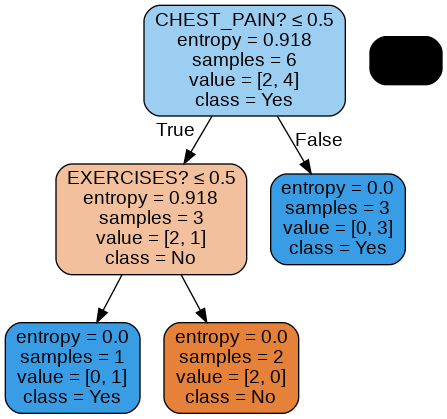

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
labl = ['CHEST_PAIN?','MALE?','SMOKES?','EXERCISES?']
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = labl,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())